<a href="https://colab.research.google.com/github/Aratrika93/Kapoor/blob/main/Aratrika_Basu_Problem_set_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np 
import pandas as pd
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files 
uploaded = files.upload()
uploadedZ = files.upload()

Saving ps3_genetic_fingerprints.npy to ps3_genetic_fingerprints (3).npy


Saving ps3_patient_zet.npy to ps3_patient_zet (4).npy


In [170]:
#Run this if ran on Colab
import io 
X = np.load(io.BytesIO(uploaded['ps3_genetic_fingerprints.npy'])) 
b1 = np.load(io.BytesIO(uploadedZ['ps3_patient_zet.npy'])) 
X.shape, b1.shape

((16930, 512), (512,))

In [ ]:
#Run this if ran on Jupyter notebook
X = np.load('ps3_genetic_fingerprints.npy')
b1 = np.load('ps3_patient_zet.npy') 
X.shape, b1.shape

In [171]:
#Data Exploration

In [173]:
data = pd.DataFrame(X)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.0,3.128559,0.000000,0.0,4.496228,0.0,0.0,0.0,0.0,0.0,0.0,9.329172,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.698161,0.0,0.000000,3.057609,0.0,0.000000,2.293305,0.0,0.000000,0.0,0.000000,4.567901,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.328777,0.0,0.0,0.107813,0.000000,0.000000,0.000000,0.0,0.00000,2.081274,0.0,1.615187,0.0,0.0,0.0,0.0,5.867198,0.0,0.000000,0.000000,0.0,0.0,1.249324,0.0,0.0,0.871549,0.0,2.019311,0.000000,0.0,0.069410,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.295702,0.000000,0.0,6.844680,0.0,0.0,0.0,0.0,0.0,0.0,10.515966,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.087367,0.0,2.141028,2.203477,0.0,0.000000,1.218063,0.0,0.000000,0.0,0.000000,3.976528,0.0,...,0.0,0.000000,0.0,0.0,0.0,2.488034,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.333436,0.0,1.559518,0.0,0.0,0.0,0.0,4.123314,0.0,0.000000,0.000000,0.0,0.0,2.678591,0.0,0.0,1.287397,0.0,2.145090,0.000000,0.0,1.098942,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,3.765731,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.219667,0.0,0.0,0.304137,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.708340,4.377068,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.780555,11.366491,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.519372,5.475708,1.433572,0.000000,0.0,0.00000,0.432083,0.0,5.019034,0.0,0.0,0.0,0.0,2.855581,0.0,0.000000,1.006585,0.0,0.0,4.748622,0.0,0.0,2.719997,0.0,0.000000,0.000000,0.0,0.302984,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,5.341002,0.000000,0.0,3.872762,0.0,0.0,0.0,0.0,0.0,0.0,9.674842,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.501315,0.0,2.352041,3.091592,0.0,0.000000,0.043334,0.0,0.000000,0.0,0.561752,2.180508,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.197128,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,5.511518,0.0,6.227623,0.0,0.0,0.0,0.0,6.943329,0.0,0.000000,0.000000,0.0,0.0,3.586890,0.0,0.0,1.225244,0.0,0.000000,0.000000,0.0,1.880824,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,6.891280,0.000000,0.0,7.363128,0.0,0.0,0.0,0.0,0.0,0.0,10.449700,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,6.456200,0.0,6.175744,1.672773,0.0,0.000000,2.161257,0.0,0.000000,0.0,0.658286,3.846383,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,4.059121,0.0,3.286476,0.0,0.0,0.0,0.0,8.868149,0.0,0.000000,0.000000,0.0,0.0,4.851162,0.0,0.0,0.220030,0.0,0.000000,0.000000,0.0,0.599354,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382930,0.0,0.0,0.0,0.0,0.0,0.0,7.411427,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.274830,4.153697,0.0,0.263334,0.000000,0.0,0.000000,0.0,0.000000,9.430633,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.571939,6.407273,0.000000,0.587893,0.0,0.00000,2.978759,0.0,3.576594,0.0,0.0,0.0,0.0,1.286359,0.0,0.000000,1.996297,0.0,0.0,3.998126,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
16926,0.0,0.0,0.0,0.0,0.000000,2.848180,0.0,2.615071,0.0,0.0,0.0,0.0,0.0,0.0,5.264143,0.0,0.0,0.060962,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.503601,5.577973,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.170801,8.376842,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.807816,4.804813,0.000000,0.000000,0.0,0.00000,5.683881,0.0,4.413293,0.0,0.0,0.0,0.0,3.401217,0.0,0.000000,2.771749,0.0,0.0,5.305144,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0

In [5]:
data.shape 

((16930, 512), (16930, 512))

In [17]:
kmeans = sklearn.cluster.KMeans(8,init = 'k-means++')
kmeans.fit(data)
kmeans.inertia_

4375921.974363459

In [16]:
kmeans = sklearn.cluster.KMeans(8,init = 'random')
kmeans.fit(data)
kmeans.inertia_

4514999.77563097

[]

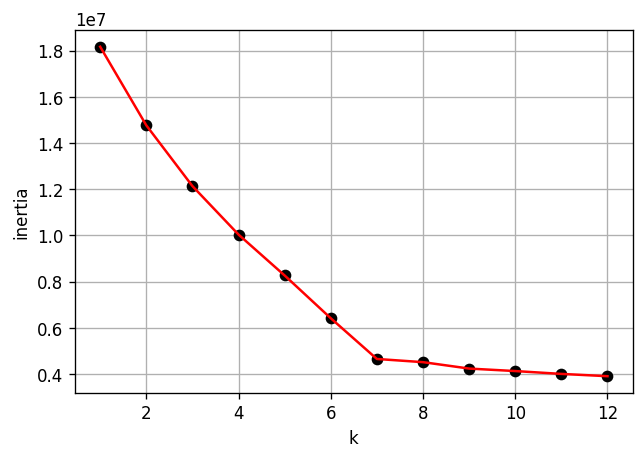

In [18]:
#Inertia plot for random initialization
x = list(range(1,13))
inertia= []
for i in x:
    kmeans = sklearn.cluster.KMeans(i, init = 'random')
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
plt.figure(dpi = 120)
plt.plot(x ,inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid()
plt.plot()


[]

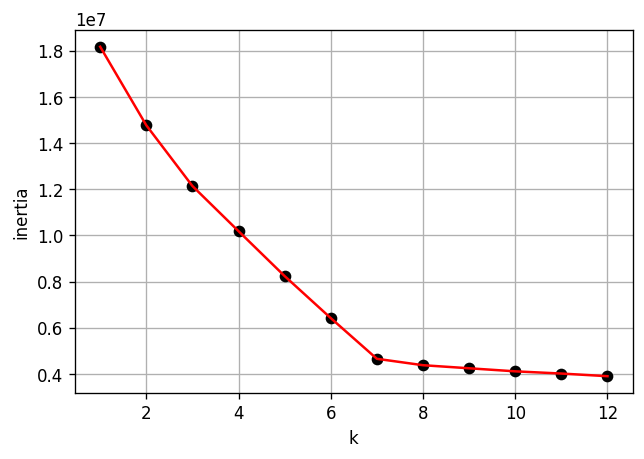

In [19]:
#Inertia plot for kmeans++ initialization
x = list(range(1,13))
inertia= []
for i in x:
    kmeans = sklearn.cluster.KMeans(i, init = 'k-means++')
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    
plt.figure(dpi = 120)
plt.plot(x ,inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid()
plt.plot()


[]

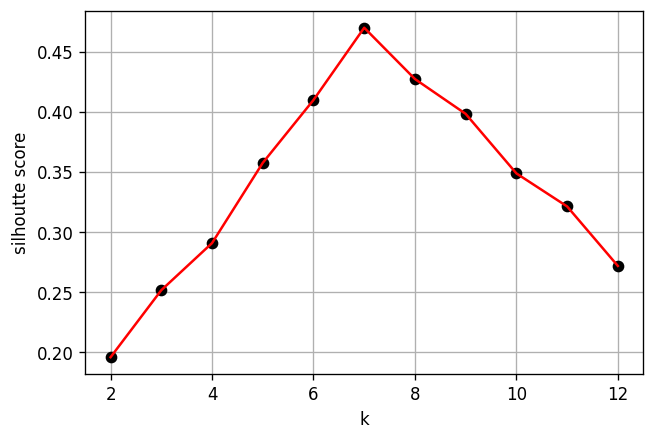

In [20]:
#Silhouette plot for random
x = list(range(2,13))
inertia= []
for i in x:
    kmeans = sklearn.cluster.KMeans(i, init = 'random')
    kmeans.fit(data)
    inertia.append(sklearn.metrics.silhouette_score(data, kmeans.labels_))

plt.figure(dpi = 120)
plt.plot(x ,inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k')
plt.ylabel('silhoutte score')
plt.grid()
plt.plot()


[]

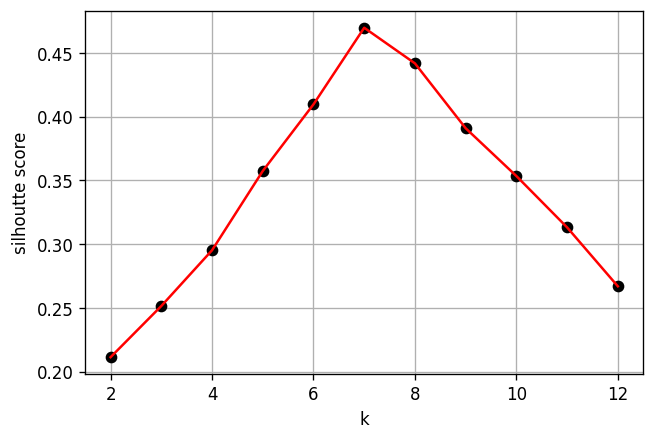

In [21]:
#Silhouette plot for kmeans++
x = list(range(2,13))
inertia= []
for i in x:
    kmeans = sklearn.cluster.KMeans(i, init = 'k-means++')
    kmeans.fit(data)
    inertia.append(sklearn.metrics.silhouette_score(data, kmeans.labels_))

plt.figure(dpi = 120)
plt.plot(x ,inertia, 'ko')
plt.plot(x, inertia, 'r-')
plt.xlabel('k')
plt.ylabel('silhoutte score')
plt.grid()
plt.plot()


In [ ]:
#So the main area of concern is either 7,8,9 cluster number.
#K-means++ performing better with k=8 cluster size rest at the other cluster sizes both the algorithms are behaving similarly.

In [22]:
def print_silhoutte_diagram(fig, ax, k, x, labels):
    silhouette_coefficients = sklearn.metrics.silhouette_samples(x, labels)
    score = sklearn.metrics.silhouette_score(x,labels)
    
    pos = 0
    for i in range(k):
        coeff = silhouette_coefficients[labels==i]
        coeff.sort()
        ax.fill_betweenx(np.arange(pos, pos + len(coeff)),0, coeff, alpha=0.7)
        pos += len(coeff)
        
    ax.axvline(x = score, color = "red", linestyle= '--')
    ax.title.set_text("k={}".format(k))
    ax.set_ylabel("Instances")
    ax.set_xlabel("Silhoutte coefficient")
    fig.tight_layout()

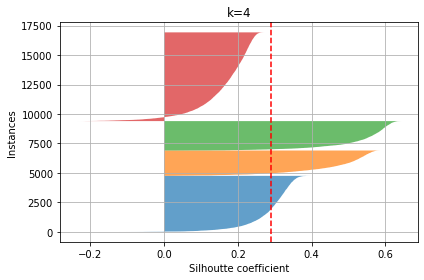

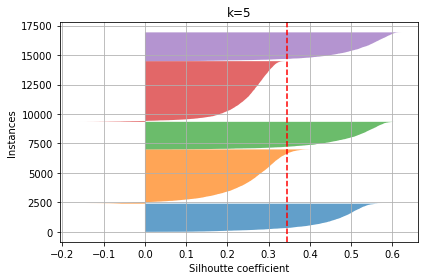

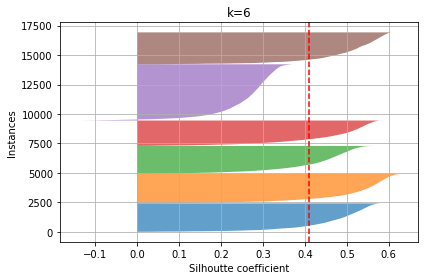

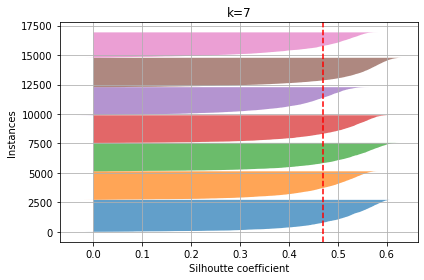

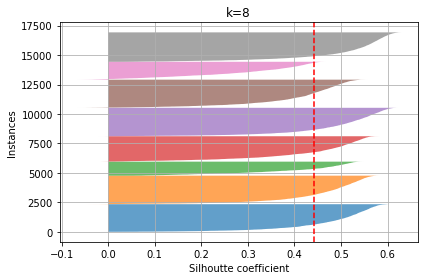

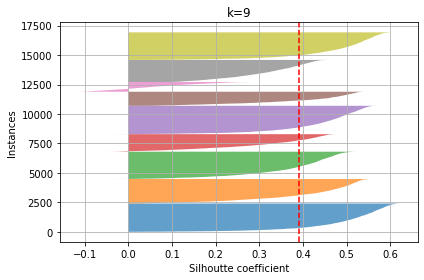

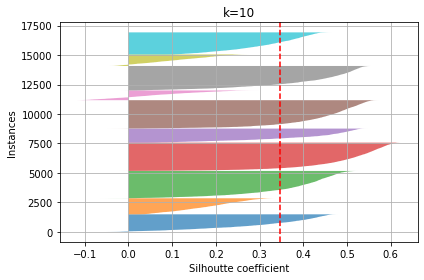

In [23]:
#Silhouette diagram for random
import matplotlib.cm as cm
for i in range(4,11):
    kmeans = sklearn.cluster.KMeans(n_clusters=i, init = 'random')
    kmeans.fit(data)
    pred_class = kmeans.fit_predict(data)
    fig, axes = plt.subplots()
    
    print_silhoutte_diagram(fig, axes, k=i, x=data, labels= kmeans.labels_)
    plt.grid()
    plt.show()


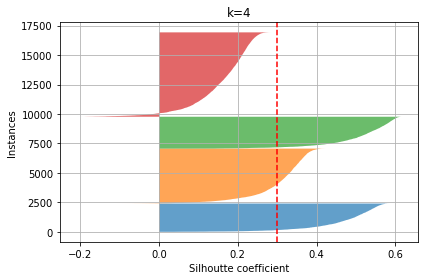

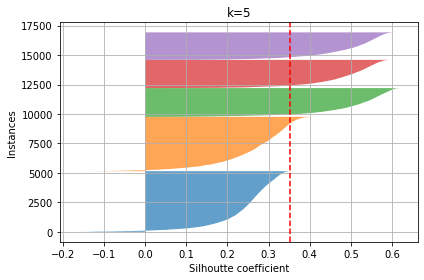

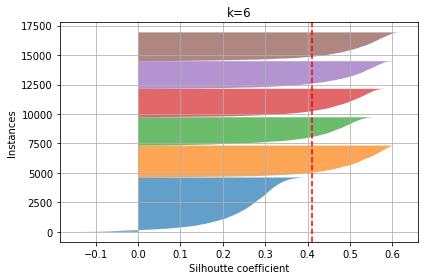

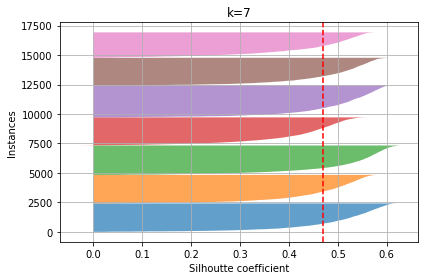

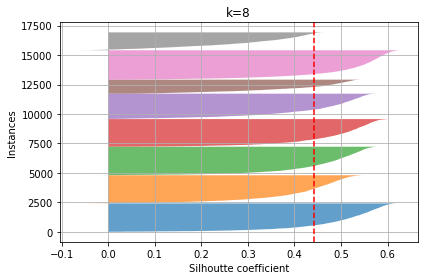

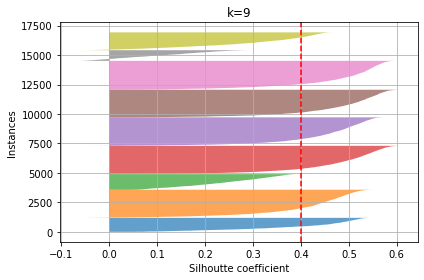

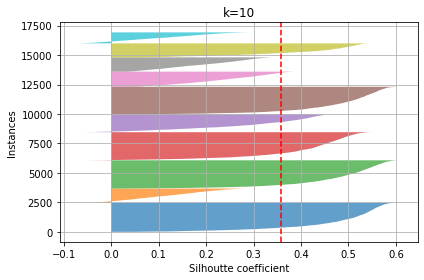

In [24]:
#Silhouette diagram for kmeans++
import matplotlib.cm as cm
for i in range(4,11):
    kmeans = sklearn.cluster.KMeans(n_clusters=i, init = 'k-means++')
    kmeans.fit(data)
    pred_class = kmeans.fit_predict(data)
    fig, axes = plt.subplots()
    
    print_silhoutte_diagram(fig, axes, k=i, x=data, labels= kmeans.labels_)
    plt.grid()
    plt.show()

In [69]:
#Training & fitting the model
from sklearn.cluster import KMeans
k = 7
kmeans1 = KMeans(n_clusters=k, init = 'random', n_init=40)
kmeans1.fit(data)
#, 

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=40, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [70]:
kmeans1.inertia_

4653289.967926914

In [161]:
clt1 = kmeans1.cluster_centers_
clt1

array([[0.0000000e+00, 1.6007107e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.9092113e-08, 4.1443855e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        5.9161829e-03, 2.9685907e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        3.8523413e-04, 3.2479875e-08],
       ...,
       [0.0000000e+00, 2.9864858e-04, 0.0000000e+00, ..., 0.0000000e+00,
        5.8321515e-05, 2.2235326e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        2.3254119e-03, 4.4202432e-05],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.6941806e-02, 3.2130629e-08]], dtype=float32)

In [77]:
z_pred = kmeans1.predict(data)
z_pred

array([3, 3, 5, ..., 2, 1, 1], dtype=int32)

In [95]:
k = 7
kmeans11 = KMeans(n_clusters=k, init = 'random', n_init=40)
kmeans11.fit(data)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=40, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [96]:
clt11 = kmeans11.cluster_centers_
clt11

array([[0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        5.9161829e-03, 2.9685907e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.6941806e-02, 3.2130629e-08],
       [0.0000000e+00, 2.9864858e-04, 0.0000000e+00, ..., 0.0000000e+00,
        5.8321515e-05, 2.2235326e-08],
       ...,
       [0.0000000e+00, 1.6007107e-10, 0.0000000e+00, ..., 0.0000000e+00,
        4.5169145e-08, 7.9456866e-03],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        3.8523413e-04, 3.2479875e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        2.3254119e-03, 4.4202432e-05]], dtype=float32)

In [97]:
z_pred11 = kmeans11.predict(data)
z_pred11

array([4, 4, 6, ..., 5, 0, 0], dtype=int32)

In [78]:
#Retraining & fitting with cluster centers
good_init1 = np.array(clt1) #Using random
kmeans2 = KMeans(n_clusters=7, init=good_init1, n_init=1)
kmeans2.fit(data)

KMeans(algorithm='auto', copy_x=True,
       init=array([[0.0000000e+00, 1.6007107e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.9092113e-08, 4.1443855e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        5.9161829e-03, 2.9685907e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        3.8523413e-04, 3.2479875e-08],
       ...,
       [0.0000000e+00, 2.9864858e-04...000000e+00,
        5.8321515e-05, 2.2235326e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        2.3254119e-03, 4.4202432e-05],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.6941806e-02, 3.2130629e-08]], dtype=float32),
       max_iter=300, n_clusters=7, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [74]:
kmeans2.inertia_

4653289.967926914

In [75]:
clt2 = kmeans2.cluster_centers_
clt2

array([[0.0000000e+00, 1.6007107e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.9092113e-08, 4.1443855e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        5.9161829e-03, 2.9685907e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        3.8523413e-04, 3.2479875e-08],
       ...,
       [0.0000000e+00, 2.9864858e-04, 0.0000000e+00, ..., 0.0000000e+00,
        5.8321515e-05, 2.2235326e-08],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        2.3254119e-03, 4.4202432e-05],
       [0.0000000e+00, 1.5643309e-10, 0.0000000e+00, ..., 0.0000000e+00,
        1.6941806e-02, 3.2130629e-08]], dtype=float32)

In [79]:
z_pred1 = kmeans2.predict(data)
z_pred1

array([3, 3, 5, ..., 2, 1, 1], dtype=int32)

In [176]:
#The centers converged

In [174]:
#PCA analysis

In [85]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca1.fit(data)
cumsum = np.cumsum(pca1.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

41

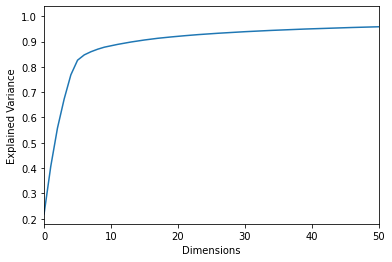

In [159]:
plt.plot(cumsum)
plt.ylabel('Explained Variance')
plt.xlabel('Dimensions')
plt.xlim(0,50)
plt.show()

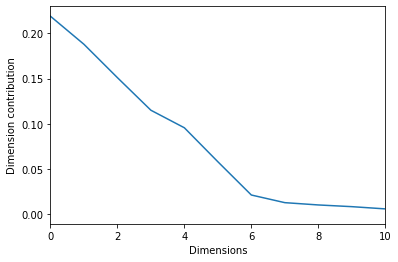

In [115]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlim(0,10)
plt.ylabel('Dimension contribution')
plt.xlabel('Dimensions')
plt.show()

In [175]:
#We can see only 6 dimensions contain the maximum contribution

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6, svd_solver="randomized")
pca.fit(data)
X2D = pca.transform(data)
X2C = pca.transform(clt2)


In [121]:
pca.explained_variance_ratio_

array([0.21909241, 0.18801482, 0.15104   , 0.11492145, 0.0954707 ,
       0.05783103], dtype=float32)

In [122]:
X2D

array([[ 20.46975   ,  -5.6553426 ,  -8.863642  ,  -0.45543778,
         -0.22804716,  -9.377705  ],
       [ 32.173164  ,  -5.6250296 , -12.933908  ,   1.0957241 ,
         -3.729814  , -12.391359  ],
       [ -4.9910803 , -16.555038  ,  -2.6811934 ,  13.238443  ,
         12.018013  ,  11.402557  ],
       ...,
       [  9.321539  ,  -8.812783  ,  23.278069  ,  15.118725  ,
         -2.4043455 ,  -3.0765214 ],
       [-21.544182  ,  -1.638688  , -13.127539  ,  12.6791525 ,
        -13.879138  ,  -0.06509946],
       [-25.287819  ,  -2.254415  , -15.02236   ,  11.937696  ,
        -20.604904  ,   2.5328636 ]], dtype=float32)

In [123]:
X2D_df = pd.DataFrame(X2D)
X2D_df['Pred'] = z_pred1
X2D_df

,0,1,2,3,4,5,Pred
0,20.469749,-5.655343,-8.863642,-0.455438,-0.228047,-9.377705,3
1,32.173164,-5.625030,-12.933908,1.095724,-3.729814,-12.391359,3
2,-4.991080,-16.555038,-2.681193,13.238443,12.018013,11.402557,5
3,25.993601,-10.613017,-9.136898,-3.750290,3.300397,-9.947250,3
4,35.301262,-12.995561,-11.019108,-1.153242,-0.914206,-14.857193,3
...,...,...,...,...,...,...,...
16925,-3.157704,-10.338870,-8.795965,8.147705,14.698500,9.576688,5
16926,-5.473311,-15.804784,-7.377630,9.069678,20.400743,11.073753,5
16927,9.321539,-8.812783,23.278069,15.118725,-2.404346,-3.076521,2
16928,-21.544182,-1.638688,-13.127539,12.679152,-13.879138,-0.065099,1


In [124]:
X2C

array([[ -6.146022  , -10.089235  ,   9.080568  , -19.820662  ,
         -6.171214  ,   1.0373131 ],
       [-18.943878  ,   1.1737851 , -13.377981  ,   9.472722  ,
        -15.282892  ,  -0.41752183],
       [  1.7275927 ,  -2.455945  ,  24.373457  ,  14.015478  ,
         -0.9172139 ,  -1.9048123 ],
       [ 24.497858  ,  -8.880937  , -10.451717  ,   0.16766635,
         -0.77705634,  -9.552671  ],
       [ 17.513435  ,  22.844591  ,  -1.3266637 ,  -1.9890174 ,
         -3.0546188 ,  11.1194515 ],
       [ -3.865304  , -17.091724  ,  -8.045311  ,   4.7015142 ,
         13.751141  ,   9.5632305 ],
       [-13.599474  ,  18.336094  ,  -1.7408335 ,  -4.010378  ,
         12.663936  ,  -8.360031  ]], dtype=float32)

In [128]:
X2C.shape, X2D.shape

((7, 6), (16930, 6))

In [ ]:
#Visualing the clusters

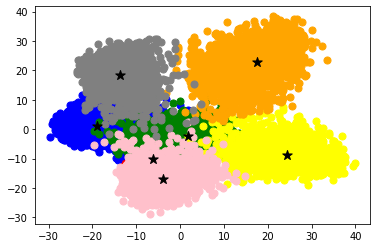

In [130]:
plt.scatter(X2D[z_pred1 == 0,0], X2D[z_pred1 == 0,1], s= 50, color = 'red')
plt.scatter(X2D[z_pred1 == 1,0], X2D[z_pred1 == 1,1], s= 50, color = 'blue')
plt.scatter(X2D[z_pred1 == 2,0], X2D[z_pred1 == 2,1], s= 50, color = 'green')
plt.scatter(X2D[z_pred1 == 3,0], X2D[z_pred1 == 3,1], s= 50, color = 'yellow')
plt.scatter(X2D[z_pred1 == 4,0], X2D[z_pred1 == 4,1], s= 50, color = 'orange')
plt.scatter(X2D[z_pred1 == 5,0], X2D[z_pred1 == 5,1], s= 50, color = 'pink')
plt.scatter(X2D[z_pred1 == 6,0], X2D[z_pred1 == 6,1], s= 50, color = 'grey')
plt.scatter(X2C[0][0], X2C[0][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[1][0], X2C[1][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[2][0], X2C[2][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[3][0], X2C[3][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[4][0], X2C[4][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[5][0], X2C[5][1], marker='*', s=100, color = 'black')
plt.scatter(X2C[6][0], X2C[6][1], marker='*', s=100, color = 'black')
plt.show()

In [131]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    X2D_df,
    labels=labels,
    dimensions=range(6),color = X2D_df['Pred']
)
fig.update_traces(diagonal_visible=False)

fig.show()

In [162]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    X2D_df, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',color = X2D_df['Pred'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [177]:
b2 = b1.reshape(1,-1)
b2.shape

(1, 512)

In [142]:
y_pred = kmeans2.predict(b2)
y_pred

array([2], dtype=int32)

In [143]:
data['Clusters'] = z_pred1


In [144]:
data['Predictions'] = y_pred[0]

In [146]:
data['Predicted'] = np.where(data['Clusters']==data['Predictions'], '1', '0')

In [147]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,Clusters,Predictions,Predicted
0,0.0,0.0,0.0,0.0,3.128559,0.000000,0.0,4.496228,0.0,0.0,0.0,0.0,0.0,0.0,9.329172,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.698161,0.0,0.000000,3.057609,0.0,0.000000,2.293305,0.0,0.000000,0.0,0.000000,4.567901,0.0,...,0.0,0.0,0.328777,0.0,0.0,0.107813,0.000000,0.000000,0.000000,0.0,0.00000,2.081274,0.0,1.615187,0.0,0.0,0.0,0.0,5.867198,0.0,0.000000,0.000000,0.0,0.0,1.249324,0.0,0.0,0.871549,0.0,2.019311,0.000000,0.0,0.069410,0.0,0.0,0.0,0.0,3,2,0
1,0.0,0.0,0.0,0.0,5.295702,0.000000,0.0,6.844680,0.0,0.0,0.0,0.0,0.0,0.0,10.515966,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.087367,0.0,2.141028,2.203477,0.0,0.000000,1.218063,0.0,0.000000,0.0,0.000000,3.976528,0.0,...,0.0,0.0,2.488034,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.333436,0.0,1.559518,0.0,0.0,0.0,0.0,4.123314,0.0,0.000000,0.000000,0.0,0.0,2.678591,0.0,0.0,1.287397,0.0,2.145090,0.000000,0.0,1.098942,0.0,0.0,0.0,0.0,3,2,0
2,0.0,0.0,0.0,0.0,0.000000,3.765731,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.219667,0.0,0.0,0.304137,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.708340,4.377068,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.780555,11.366491,0.0,...,0.0,0.0,0.000000,0.0,0.0,4.519372,5.475708,1.433572,0.000000,0.0,0.00000,0.432083,0.0,5.019034,0.0,0.0,0.0,0.0,2.855581,0.0,0.000000,1.006585,0.0,0.0,4.748622,0.0,0.0,2.719997,0.0,0.000000,0.000000,0.0,0.302984,0.0,0.0,0.0,0.0,5,2,0
3,0.0,0.0,0.0,0.0,5.341002,0.000000,0.0,3.872762,0.0,0.0,0.0,0.0,0.0,0.0,9.674842,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.501315,0.0,2.352041,3.091592,0.0,0.000000,0.043334,0.0,0.000000,0.0,0.561752,2.180508,0.0,...,0.0,0.0,0.197128,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,5.511518,0.0,6.227623,0.0,0.0,0.0,0.0,6.943329,0.0,0.000000,0.000000,0.0,0.0,3.586890,0.0,0.0,1.225244,0.0,0.000000,0.000000,0.0,1.880824,0.0,0.0,0.0,0.0,3,2,0
4,0.0,0.0,0.0,0.0,6.891280,0.000000,0.0,7.363128,0.0,0.0,0.0,0.0,0.0,0.0,10.449700,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,6.456200,0.0,6.175744,1.672773,0.0,0.000000,2.161257,0.0,0.000000,0.0,0.658286,3.846383,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,4.059121,0.0,3.286476,0.0,0.0,0.0,0.0,8.868149,0.0,0.000000,0.000000,0.0,0.0,4.851162,0.0,0.0,0.220030,0.0,0.000000,0.000000,0.0,0.599354,0.0,0.0,0.0,0.0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382930,0.0,0.0,0.0,0.0,0.0,0.0,7.411427,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.274830,4.153697,0.0,0.263334,0.000000,0.0,0.000000,0.0,0.000000,9.430633,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.571939,6.407273,0.000000,0.587893,0.0,0.00000,2.978759,0.0,3.576594,0.0,0.0,0.0,0.0,1.286359,0.0,0.000000,1.996297,0.0,0.0,3.998126,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5,2,0
16926,0.0,0.0,0.0,0.0,0.000000,2.848180,0.0,2.615071,0.0,0.0,0.0,0.0,0.0,0.0,5.264143,0.0,0.0,0.060962,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.503601,5.577973,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.170801,8.376842,0.0,...,0.0,0.0,0.000000,0.0,0.0,2.807816,4.804813,0.000000,0.000000,0.0,0.00000,5.683881,0.0,4.413293,0.0,0.0,0.0,0.0,3.401217,0.0,0.000000,2.771749,0.0,0.0,5.305144,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5,2,0
16927,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000

In [148]:
df = pd.DataFrame(data['Predicted'].reset_index())


In [149]:
df.rename(columns = {'index':'Id'}, inplace = True) 

In [150]:
df

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
16925,16925,0
16926,16926,0
16927,16927,1
16928,16928,0


In [152]:
df['Predicted'].value_counts()

0    14508
1     2422
Name: Predicted, dtype: int64

In [154]:
df.to_csv('Problem3_V3.csv', index=False)

# New Section